In [1]:
import os, glob
import numpy as np
import pandas as pd
os.chdir("D:/takehome_challenge/Identifying_Fraudulent_Activities/Fraud")

In [2]:
from tqdm import tqdm_notebook as tqdm

In [3]:
fraud = pd.read_csv('Fraud_Data.csv')
ip = pd.read_csv('IpAddress_to_Country.csv')

In [4]:
fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [5]:
ip

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


## Determine user's country

In [ ]:
fraud['country'] = 0
for index1, row1 in tqdm(fraud.iterrows()):
    for index2, row2 in ip.iterrows():
        if (row1['ip_address'] >= row2['lower_bound_ip_address']) & (row1['ip_address']<=row2['upper_bound_ip_address']):
      
            fraud.loc[index1, 'country'] = row2['country'] 
# This requires large computing power...not my laptop

## Feature Engineering

Time difference between sign-up and purchasing

In [6]:
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])

fraud['time_diff'] = (fraud['purchase_time'] - fraud['signup_time'])/np.timedelta64(1, 'D')

In [7]:
fraud['purchase_week'] = fraud['purchase_time'].dt.week
fraud['signup_week'] = fraud['signup_time'].dt.week

In general, whenever you have a date, extract week of the year, and day of the week. They tend to give an idea of seasonlity and weekly trends.

Are there any shared devices?

In [8]:
device = pd.DataFrame(fraud.groupby(['device_id'])['device_id'].count())

In [9]:
device.columns = ['count']

Are there any shared ip addresses?

In [10]:
ip_add = pd.DataFrame(fraud.groupby(['ip_address'])['ip_address'].count())

In [11]:
ip_add.columns = ['count']

In [12]:
fraud = fraud.merge(device, how = 'left', right_on = 'device_id', left_on = 'device_id')

In [13]:
fraud = fraud.merge(ip_add, how = 'left', right_on = 'ip_address', left_on = 'ip_address')

In [14]:
fraud = fraud.rename({'count_x':'shared_devices'}, axis = 'columns')

In [15]:
fraud =  fraud.rename({'count_y':"shared_ip"}, axis = 'columns')

In [16]:
fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_diff,purchase_week,signup_week,shared_devices,shared_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,52.160671,16,9,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,0.207685,24,23,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000012,1,1,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5.695428,19,18,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,50.479873,37,30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,60.893900,13,5,2,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,10.778588,22,20,1,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,77.333519,21,10,1,1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,59.561563,37,28,2,1


I will use classification model and confusion matrix to evaluate the model.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
fraud = fraud.drop(['user_id','signup_time','purchase_time','device_id','ip_address'], axis = 1)

In [19]:
columns = ['source','browser','sex']
fraud = pd.get_dummies(fraud, columns = columns)

In [20]:
train, test = train_test_split(fraud, test_size = 0.3, random_state = 0, stratify = fraud['class'])
train_x = train.drop(['class'], axis = 1)
train_y = train['class']
test_x = test.drop(['class'],axis = 1)
test_y = test['class']

In [21]:
rf = RandomForestClassifier(oob_score = True)
boosting = GradientBoostingClassifier()

In [22]:
rf.fit(train_x, train_y)
predit_rf = rf.predict(test_x)

In [23]:
confusion_matrix(test_y,predit_rf)

array([[41032,    57],
       [ 1888,  2357]], dtype=int64)

In [24]:
#accuracy
(41036+2354)/(41036+2354+1891+53)

0.9571182776723872

In [25]:
rf.oob_score_

0.9550379095842235

In [89]:
boosting.fit(train_x, train_y)
predict_boosting = boosting.predict(test_x)

In [91]:
confusion_matrix(test_y,predict_boosting)

array([[41088,     1],
       [ 1913,  2332]], dtype=int64)

In [99]:
# accuracy
(41088+2332)/(1+1913+41088+2332)

0.9577800326465787

The random forest model and gradient boosting model don't have overfitting and they both have high accuracy. If we look at *false positive*, we can see random forest classifier has 1893 cases, while gradient boosting classifier has 1913 cases, which are not significantly different.

If we look at *false negative*, random forest classifier has 55 cases, while another model only has 1 case. If we have different assumptions about these two cases, we may need to choose different models.

For example, if we need to catch every fraudulent cases, then we need low false negative rate; If we don't want to miss normal transactions, we need low false positive rate.

*These models already have high accuracy and they are not overfitted. As a take-home challenge, I will eliminate cross validation and model fitting.

## Model interpretation and recommendations

In [113]:
rf.feature_importances_

array([0.0866041 , 0.0764538 , 0.31241655, 0.17994278, 0.08260798,
       0.10431987, 0.11647891, 0.00363685, 0.00245689, 0.00335811,
       0.00576241, 0.00464903, 0.00497469, 0.0019485 , 0.00476614,
       0.00488679, 0.00473661])

The difference between sign-up and purchase is the most important feature. Other than that, the week in which purchse occurred also has important meaning in terms of predicting. This is kinda surprising.

In [125]:
# plot one of the trees

estimator = rf.estimators_[0]

[Text(266.4416355267357, 428.84, 'X[3] <= 3.5\ngini = 0.168\nsamples = 66829\nvalue = [96006, 9772]'),
 Text(4.661031240174923, 416.76, 'X[3] <= 2.5\ngini = 0.187\nsamples = 3644\nvalue = [602, 5148]'),
 Text(1.9138537170949212, 404.68, 'X[6] <= 2.0\ngini = 0.106\nsamples = 3119\nvalue = [278, 4662]'),
 Text(0.5103609912253123, 392.6, 'X[15] <= 0.5\ngini = 0.053\nsamples = 144\nvalue = [252, 7]'),
 Text(0.3827707434189842, 380.52, 'gini = 0.0\nsamples = 83\nvalue = [145, 0]'),
 Text(0.6379512390316404, 380.52, 'X[2] <= 4.162\ngini = 0.115\nsamples = 61\nvalue = [107, 7]'),
 Text(0.5103609912253123, 368.44, 'gini = 0.0\nsamples = 31\nvalue = [55, 0]'),
 Text(0.7655414868379684, 368.44, 'X[1] <= 45.5\ngini = 0.209\nsamples = 30\nvalue = [52, 7]'),
 Text(0.5103609912253123, 356.36, 'X[0] <= 24.5\ngini = 0.191\nsamples = 28\nvalue = [50, 6]'),
 Text(0.3827707434189842, 344.28, 'gini = 0.0\nsamples = 12\nvalue = [27, 0]'),
 Text(0.6379512390316404, 344.28, 'X[0] <= 33.5\ngini = 0.328\nsampl

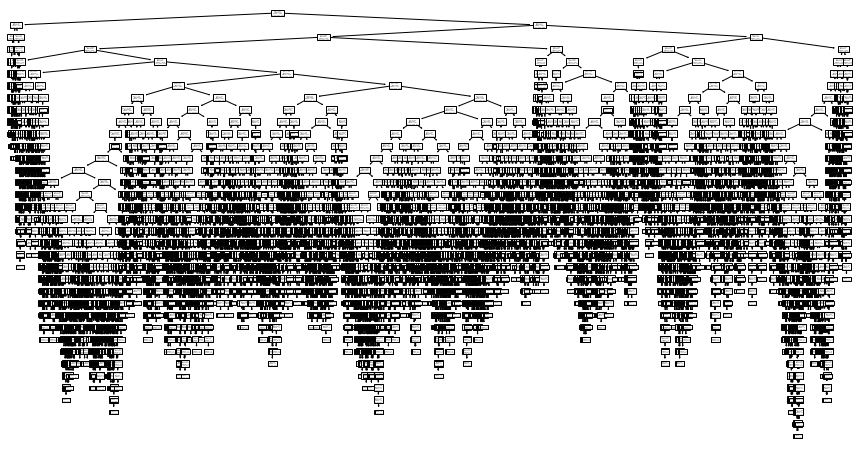

In [126]:
fig = plt.figure(figsize=(15,8))
tree.plot_tree(estimator)

In [ ]:
from sklearn.inspection import plot_partial_dependence
features = ['time_diff', 'purchase_week','shared_ip','shared_devices']
plot_partial_dependence(rf, train_x, features)

In terms of practical using, I think it is important to sensor the users' purchase behavior, including the week they purchased, and whether they used a shared ip, etc. Once we detect this, we should put their characteristics into the model and predict the fradulent probability. (real-time detection)

1. If predicted fraud probability < X, the user has the normal experience (the high majority should fall
here)
2. If X <= predicted fraud probability < Z (so the user is at risk, but not too much), you can create an
additional verification step, like verify your phone number via a code sent by SMS or log in via
Facebook.
3. If predicted fraud probability >= Z (so here is really likely the user is trying to commit a fraud), you
can tell the user his session has been put on hold, send this user info to someone who reviews it
manually and either blocks the user or decides it is not a fraud so the session is resumed.